#  Random Forest Regression of the EPA dataset

This is a Random Forest Regression of the EPA dataset i performed the linear regression on in an earlier blog post.  Most of the data engineering is already done, but there are a couple of small items to deal with along the way.  I perform the analysis as i was taught, most of this knowledge came from the Fastai ML course, free and public.

To begin, load some stuff.


In [18]:
%matplotlib inline

from fastai.structured import *

import pandas  as pd 
import numpy  as np 
from graphviz import Digraph
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

Set a path and list contents of directory, i go back and forth between mac and ubuntu so this works for me.

In [19]:
PATH = "../data/"
!ls {PATH}

18tstcar.csv                  mtcars.csv
Robey.csv                     mtcarsShort.csv
US-Education.csv              test-car-list-definitions.pdf
USA.dataAll.csv               us-counties.json
US_Unemployment_Oct2012.csv   us_counties_20m_topo.json
birthwt-small.csv             us_county_data.csv
birthwt.csv                   world-countries.json
epaMpg.csv


Read the csv file into a pandas dataframe. 

In [20]:
epa = pd.read_csv(f'{PATH}epaMpg.csv')

This the the same head command that exists in R, the "T" will transpose or pivot the dataframe. 

In [21]:
epa.head().T

,0,1,2,3,4
Unnamed: 0,1,2,3,4,5
Represented.Test.Veh.Make,Aston Martin,Aston Martin,BENTLEY,BENTLEY,BMW
Model,Rapide S,Vanquish,Continental GT,Continental GT,230i Convertible
Vehicle.Type,Car,Car,Car,Car,Car
HorsePower,552,568,616,616,248
Cylinders,12,12,12,12,4
Tested.Transmission.Type.Code,SA,SA,SA,SA,SA
Tested.Transmission.Type,Semi-Automatic,Semi-Automatic,Semi-Automatic,Semi-Automatic,Semi-Automatic
Gears,8,8,8,8,8
Drive.System.Code,R,R,F,F,R


Describe() is similar to summary in R, once again, "T" will transpose the dataframe. 

In [22]:
epa.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1034.0,521.361702,300.241933,1.00,262.250,520.50,781.75,1040.00
HorsePower,1034.0,291.824952,144.294932,72.00,181.000,271.50,355.00,1500.00
Cylinders,1034.0,5.431335,1.905214,3.00,4.000,4.00,6.00,16.00
Gears,1034.0,6.509671,1.992824,1.00,6.000,7.00,8.00,10.00
Weight,1034.0,4191.852031,787.821434,2375.00,3625.000,4000.00,4750.00,6500.00
AxleRatio,1034.0,3.411064,0.586484,1.56,3.070,3.36,3.70,5.44
Test.Procedure.Cd,1034.0,24.993230,22.078601,2.00,11.000,21.00,31.00,95.00
Test.Fuel.Type.Cd,1034.0,56.366538,11.633650,19.00,61.000,61.00,61.00,61.00
FuelEcon,1034.0,28.216538,9.496233,9.20,21.525,26.80,33.40,71.60


In R all of the spaces in my column names became periods, Python hates periods, so i convert them to "_".

In [23]:
epa = epa.drop(epa.columns[[0]], axis=1)

epa.columns = epa.columns.str.replace('.', '_')


In [24]:
epa.describe().T

,count,mean,std,min,25%,50%,75%,max
HorsePower,1034.0,291.824952,144.294932,72.00,181.000,271.50,355.0,1500.00
Cylinders,1034.0,5.431335,1.905214,3.00,4.000,4.00,6.0,16.00
Gears,1034.0,6.509671,1.992824,1.00,6.000,7.00,8.0,10.00
Weight,1034.0,4191.852031,787.821434,2375.00,3625.000,4000.00,4750.0,6500.00
AxleRatio,1034.0,3.411064,0.586484,1.56,3.070,3.36,3.7,5.44
Test_Procedure_Cd,1034.0,24.993230,22.078601,2.00,11.000,21.00,31.0,95.00
Test_Fuel_Type_Cd,1034.0,56.366538,11.633650,19.00,61.000,61.00,61.0,61.00
FuelEcon,1034.0,28.216538,9.496233,9.20,21.525,26.80,33.4,71.60


In [25]:
#Change any columns of strings in a panda's dataframe to a column of
#catagorical values. This applies the changes inplace.

#Parameters:
#-----------
#df: A pandas dataframe. Any columns of strings will be changed to
#    categorical values.
#<function fastai.structured.train_cats> 

train_cats

<function fastai.structured.train_cats>

Following the logic below you can see that train_cats is a fastai function that will identify a string variable that can be converted to categorical or factor.  I till generate the codes for you so they can be updated in place. 

In [26]:
train_cats(epa)

In [27]:
Represented_Test_Veh_Make = epa.Represented_Test_Veh_Make.cat.categories

In [28]:
Represented_Test_Veh_Make

Index(['ACURA', 'AUDI', 'Alfa Romeo', 'Aston Martin', 'BENTLEY', 'BMW',
       'BUGATTI', 'BUICK', 'CADILLAC', 'CHEVROLET', 'Chrysler', 'Dodge',
       'FORD', 'Ferrari', 'Fiat', 'Ford', 'GMC', 'HONDA', 'HYUNDAI', 'Hyundai',
       'INFINITI', 'Jaguar', 'Jeep', 'KIA', 'Karma', 'Kia', 'LAMBORGHINI',
       'LEXUS', 'Land Rover', 'Lincoln', 'MASERATI', 'MAZDA', 'MINI',
       'MITSUBISHI', 'Mercedes-Benz', 'Mini', 'NISSAN', 'Porsche', 'RAM',
       'Rolls Royce', 'SCION', 'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'Volvo'],
      dtype='object')

In [29]:
epa.Represented_Test_Veh_Make.cat.set_categories(Represented_Test_Veh_Make, ordered=True, inplace=True)

In [30]:
epa.Represented_Test_Veh_Make = epa.Represented_Test_Veh_Make.cat.codes

Notice the Represented_Test_Veh_Make is not a factor. 

In [31]:
epa.head().T

,0,1,2,3,4
Represented_Test_Veh_Make,3,3,4,4,5
Model,Rapide S,Vanquish,Continental GT,Continental GT,230i Convertible
Vehicle_Type,Car,Car,Car,Car,Car
HorsePower,552,568,616,616,248
Cylinders,12,12,12,12,4
Tested_Transmission_Type_Code,SA,SA,SA,SA,SA
Tested_Transmission_Type,Semi-Automatic,Semi-Automatic,Semi-Automatic,Semi-Automatic,Semi-Automatic
Gears,8,8,8,8,8
Drive_System_Code,R,R,F,F,R
Weight,4750,4500,6000,6000,4000


So instead of going through an entire dataframe and converting string and text to numeric, proc_df will do the entire dataframe.

In [32]:
epa_trn, y_trn, nas = proc_df(epa, 'FuelEcon')

Check it out, no more text!

In [33]:
epa_trn.head(25).T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Represented_Test_Veh_Make,3.00,3.00,4.00,4.00,5.00,5.00,5.00,5.00,5.00,5.0,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
Model,436.00,505.00,191.00,191.00,5.00,6.00,6.00,7.00,8.00,10.0,...,15.00,16.00,16.00,17.00,18.00,19.00,20.00,20.00,21.00,21.00
Vehicle_Type,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.0,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
HorsePower,552.00,568.00,616.00,616.00,248.00,248.00,248.00,248.00,248.00,181.0,...,180.00,248.00,248.00,248.00,248.00,248.00,320.00,320.00,320.00,320.00
Cylinders,12.00,12.00,12.00,12.00,4.00,4.00,4.00,4.00,4.00,4.0,...,4.00,4.00,4.00,4.00,4.00,4.00,6.00,6.00,6.00,6.00
Tested_Transmission_Type_Code,6.00,6.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,1.0,...,6.00,6.00,5.00,6.00,6.00,6.00,6.00,5.00,6.00,5.00
Tested_Transmission_Type,7.00,7.00,7.00,7.00,7.00,5.00,7.00,7.00,7.00,3.0,...,7.00,7.00,5.00,7.00,7.00,7.00,7.00,5.00,7.00,5.00
Gears,8.00,8.00,8.00,8.00,8.00,6.00,8.00,8.00,8.00,8.0,...,8.00,8.00,6.00,8.00,8.00,8.00,8.00,6.00,8.00,6.00
Drive_System_Code,5.00,5.00,3.00,3.00,5.00,5.00,5.00,5.00,5.00,5.0,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
Weight,4750.00,4500.00,6000.00,6000.00,4000.00,3625.00,3625.00,4000.00,3750.00,3625.0,...,4250.00,3875.00,3750.00,4000.00,4250.00,4250.00,4000.00,4000.00,4000.00,4000.00


A handy dandy funtion to split our trianing and validation set, as well as out dependant variable. 

In [34]:
def split_vals(a,n): return a[:n], a[n:]

n_valid = int(len(epa_trn)*.25)
print(n_valid)
n_trn = len(epa_trn)-n_valid
X_train, X_valid = split_vals(epa_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(epa, n_trn)

258


Funtioon to perfom the math to return RMSE and R^2

In [35]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    print("RMSE Train,           RMSE Prediction,    R^2 Train,         R^2 Prediction")
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

### Base Model

Last but not leaset, the actual call to RandomForestRegressor, this will generate out random forest with n_jobs=-1 allowing use of all cores oon the machine, and max_depth=3 allows for a tree that is 3 deep.  only 3 deep sp we can see the picture below. 

Root Mean Square Error of he training set, the validation set, the R^2 of the training set and the validation set. 

In [37]:
m = RandomForestRegressor(n_jobs=-1,max_depth=3)
m.fit(X_train, y_train)
print_score(m)

RMSE Train,           RMSE Prediction,    R^2 Train,         R^2 Prediction
[4.5431396346344295, 5.303701840285408, 0.7589696150819684, 0.7267131839584007]


Check it out, an actual tree! 

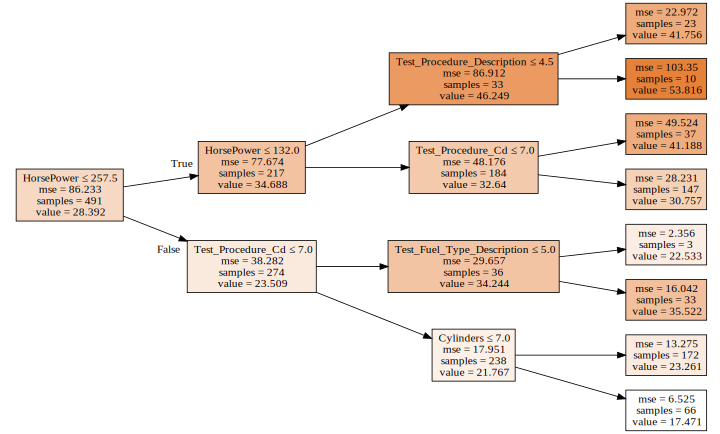

In [38]:
draw_tree(m.estimators_[0], X_train, precision=3)

In [39]:
m.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1792890733, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1185331528, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=223910256, splitter='best'),
 DecisionTreeRegressor(criter

In [40]:
m = RandomForestRegressor(n_estimators=1,n_jobs=-1,max_depth=5)
m.fit(X_train, y_train)
print_score(m)



RMSE Train,           RMSE Prediction,    R^2 Train,         R^2 Prediction
[3.9291657558107476, 5.383733053435963, 0.8197146967839594, 0.7184033305864296]


In [43]:
m = RandomForestRegressor(n_estimators=2,n_jobs=-1,max_depth=5)
m.fit(X_train, y_train)
print_score(m)


RMSE Train,           RMSE Prediction,    R^2 Train,         R^2 Prediction
[3.624478005904173, 4.793408964834995, 0.8465910980628262, 0.7767716002379662]


In [44]:
m = RandomForestRegressor(n_estimators=10,n_jobs=-1,max_depth=5)
m.fit(X_train, y_train)
print_score(m)


RMSE Train,           RMSE Prediction,    R^2 Train,         R^2 Prediction
[2.957038426739578, 4.8016224728011245, 0.8978887575836642, 0.7760059409359751]


In [47]:
m = RandomForestRegressor(n_estimators=60,n_jobs=-1,max_depth=5)
m.fit(X_train, y_train)
print_score(m)

RMSE Train,           RMSE Prediction,    R^2 Train,         R^2 Prediction
[2.9113857055307917, 4.668561556117906, 0.901017341352274, 0.7882484210705338]


In [48]:
m = RandomForestRegressor(n_estimators=10,n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE Train,           RMSE Prediction,    R^2 Train,         R^2 Prediction
[1.3898841299728917, 4.475967691229776, 0.9774411572929003, 0.8053589833033025]


In [49]:
set_rf_samples(500)

In [50]:
m = RandomForestRegressor(n_jobs=-1,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE Train,           RMSE Prediction,    R^2 Train,         R^2 Prediction
[1.8705410222690941, 5.107730835835387, 0.9591404011984577, 0.746535883221923, 0.8589083034821692]


In [51]:
m = RandomForestRegressor(n_estimators=50, n_jobs=-1, min_samples_leaf=1, max_features=0.5,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE Train,           RMSE Prediction,    R^2 Train,         R^2 Prediction
[1.7870332108516374, 4.441296418778796, 0.9627072103721745, 0.8083627201971175, 0.8761671158632295]


 # Feature importance
 
This comes from feature_importances_ in RandomForestRegressor.

The feature importances (the higher, the more important the feature).



In [62]:
fi = rf_feat_importance(m,epa_trn); fi[:120]

,cols,imp
0,Represented_Test_Veh_Make,0.370751
1,Model,0.203120
2,Vehicle_Type,0.121902
3,HorsePower,0.076130
4,Cylinders,0.050703
6,Tested_Transmission_Type,0.035579
5,Tested_Transmission_Type_Code,0.033842
7,Gears,0.024731
8,Drive_System_Code,0.019666
9,Weight,0.017814


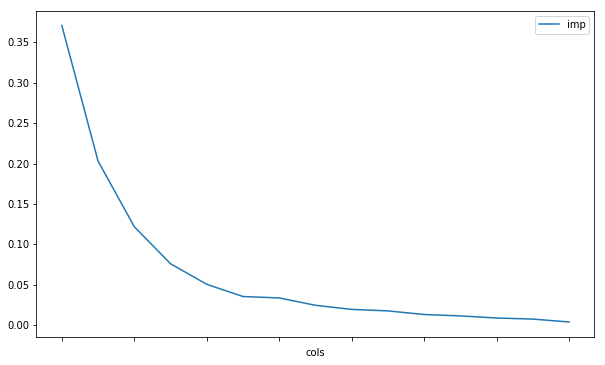

In [63]:
fi.plot('cols', 'imp', figsize=(10,6), legend=True);

In [54]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

 ## Plot Feature importance

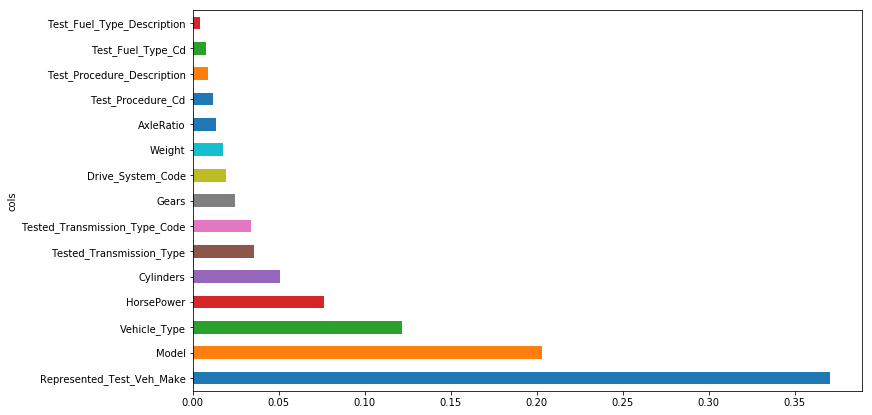

In [64]:
plot_fi(fi[:30]);

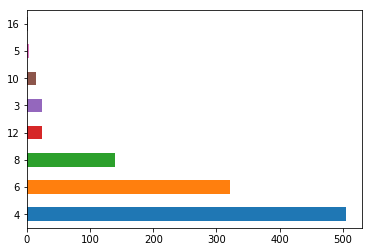

In [56]:
epa.Cylinders.value_counts().plot.barh();

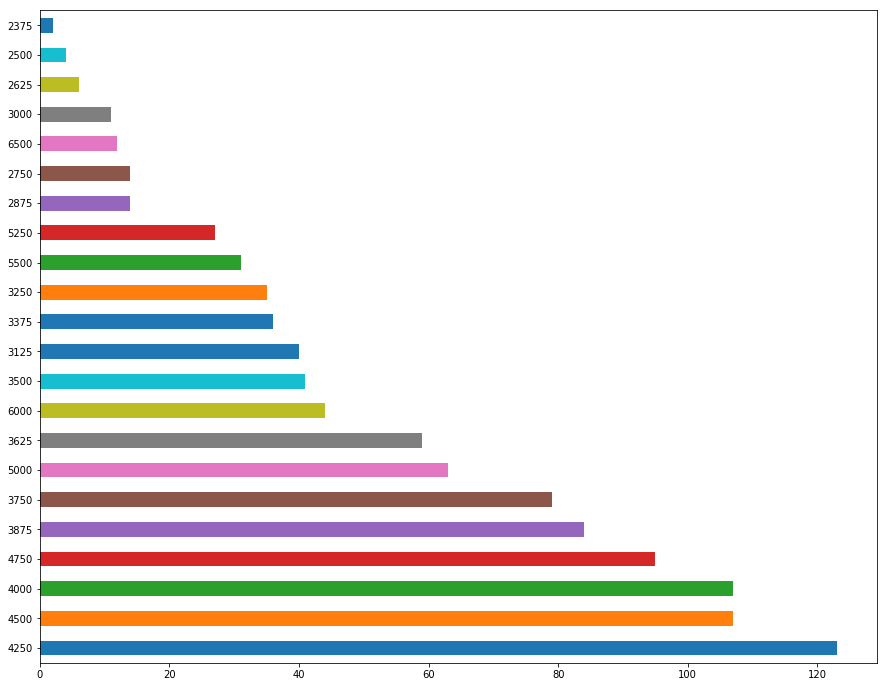

In [57]:
epa.Weight.value_counts().plot.barh(figsize=(15,12));

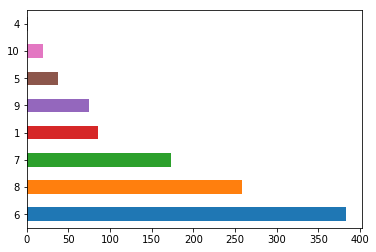

In [58]:
epa.Gears.value_counts().plot.barh();

A decision needs to be made on which features to keep, anything with an imortance > .01 is a good starting point. 

In [65]:
to_keep = fi[fi.imp>0.01].cols; len(to_keep)
epa_keep = epa_trn[to_keep].copy()
X_train, X_valid = split_vals(epa_keep, n_trn)

In [66]:
epa_keep.head().T

,0,1,2,3,4
Represented_Test_Veh_Make,3.00,3.00,4.00,4.00,5.00
Model,436.00,505.00,191.00,191.00,5.00
Vehicle_Type,2.00,2.00,2.00,2.00,2.00
HorsePower,552.00,568.00,616.00,616.00,248.00
Cylinders,12.00,12.00,12.00,12.00,4.00
Tested_Transmission_Type,7.00,7.00,7.00,7.00,7.00
Tested_Transmission_Type_Code,6.00,6.00,6.00,6.00,6.00
Gears,8.00,8.00,8.00,8.00,8.00
Drive_System_Code,5.00,5.00,3.00,3.00,5.00
Weight,4750.00,4500.00,6000.00,6000.00,4000.00


In [67]:
m = RandomForestRegressor(n_estimators=60, min_samples_leaf=1, max_features=0.75,n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE Train,           RMSE Prediction,    R^2 Train,         R^2 Prediction
[1.9787342239846808, 4.43353299456738, 0.954277017175723, 0.8090321018585712, 0.850122123819888]


# Removing redundant features

This is to evaluate colinearity and multicolinearity. 

In [68]:
from scipy.cluster import hierarchy as hc

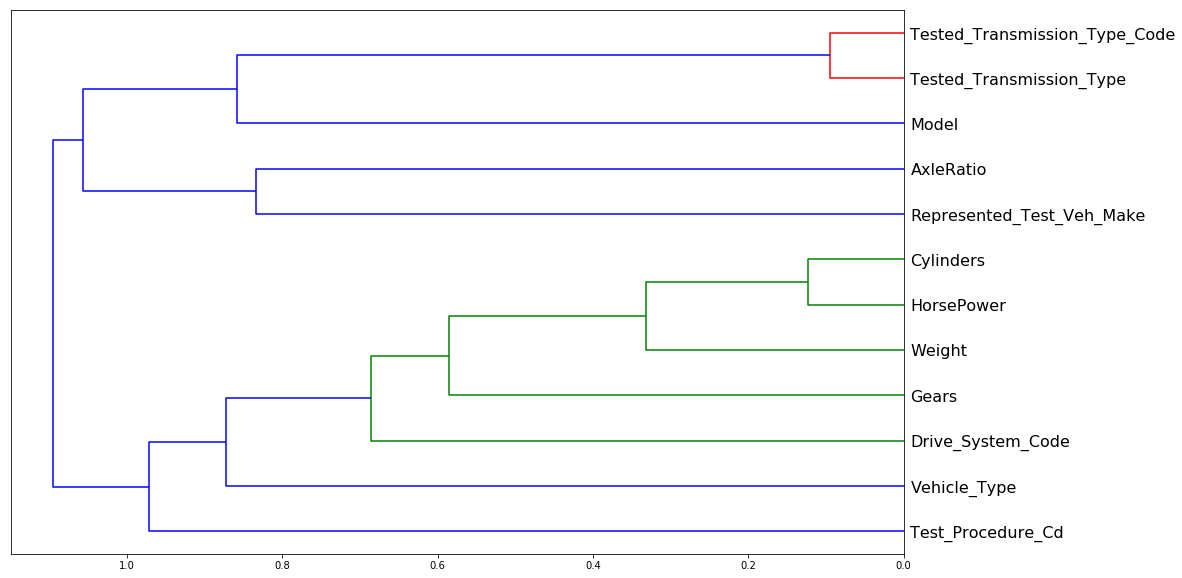

In [69]:
corr = np.round(scipy.stats.spearmanr(epa_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=epa_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [70]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=60, min_samples_leaf=1, max_features=0.75, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [71]:
get_oob(epa_keep)

0.8537126992615125

In [72]:
corr_condensed

array([0.8811, 1.0418, 1.144 , 1.1298, 1.1779, 1.1985, 1.1899, 0.9658, 1.1247, 0.8339, 1.1195, 0.9463,
       1.1216, 1.0772, 0.8581, 0.8592, 1.0907, 1.3235, 0.9281, 0.9272, 1.1063, 0.9158, 0.7725, 1.0915,
       1.1803, 1.1557, 0.8537, 0.6658, 0.8568, 1.0077, 0.123 , 1.0984, 1.108 , 0.5002, 0.6213, 0.3393,
       1.2255, 0.9689, 1.141 , 1.1836, 0.662 , 0.6215, 0.3243, 1.1992, 1.0007, 0.0944, 0.9011, 1.1083,
       0.9844, 1.126 , 0.9045, 0.9262, 1.181 , 1.1324, 1.0289, 0.9258, 0.7846, 0.5934, 1.4143, 0.9693,
       0.7165, 1.1696, 0.8864, 1.22  , 0.9931, 1.0575])

In [73]:
for c in ('Tested_Transmission_Type', 'Tested_Transmission_Type_Code',
            'Represented_Test_Veh_Make','AxleRatio'):
    print(c, get_oob(epa_keep.drop(c, axis=1)))

Tested_Transmission_Type 0.8510689554904003
Tested_Transmission_Type_Code 0.8571970840870287
Represented_Test_Veh_Make 0.8550052540335784
AxleRatio 0.8493650076942283


In [ ]:
epa_keep.head().T

In [74]:
to_drop = ['Tested_Transmission_Type', 'Represented_Test_Veh_Make']
get_oob(epa_keep.drop(to_drop, axis=1))

0.8512090820790537

In [75]:
epa_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(epa_keep, n_trn)

In [76]:
epa_keep.head().T

,0,1,2,3,4
Model,436.00,505.00,191.00,191.00,5.00
Vehicle_Type,2.00,2.00,2.00,2.00,2.00
HorsePower,552.00,568.00,616.00,616.00,248.00
Cylinders,12.00,12.00,12.00,12.00,4.00
Tested_Transmission_Type_Code,6.00,6.00,6.00,6.00,6.00
Gears,8.00,8.00,8.00,8.00,8.00
Drive_System_Code,5.00,5.00,3.00,3.00,5.00
Weight,4750.00,4500.00,6000.00,6000.00,4000.00
AxleRatio,2.73,2.73,2.85,2.85,2.81
Test_Procedure_Cd,21.00,21.00,90.00,11.00,3.00



Below is the best i could get with this dataset and model.  Many questions arise related to overfit potentials, the model of the vehicle is still there, which intuitively seems like a bad idea.  The model R^2 is better than the linear regression and the RMSE is lower as well.  I could probably spend weeks tuning this, but with such a small number of cases not much can be done.

In [77]:
m = RandomForestRegressor(n_estimators=30, min_samples_leaf=1, max_features=0.75,n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE Train,           RMSE Prediction,    R^2 Train,         R^2 Prediction
[2.0215240875975593, 4.474848631689527, 0.9522781287078333, 0.8054562975259136, 0.8486352333444027]


In [78]:
m = RandomForestRegressor(n_estimators=60, min_samples_leaf=1, max_features=0.75,n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE Train,           RMSE Prediction,    R^2 Train,         R^2 Prediction
[1.888581320495389, 4.428329748160855, 0.9583484657250193, 0.8094800831635705, 0.8553747945694608]


In [79]:
m = RandomForestRegressor(n_estimators=120, min_samples_leaf=2, max_features=0.75,n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE Train,           RMSE Prediction,    R^2 Train,         R^2 Prediction
[1.9460359810242787, 4.322521682299919, 0.9557756604685869, 0.8184756713344857, 0.8558081918083186]


In [83]:
m = RandomForestRegressor(n_estimators=120, min_samples_leaf=1, max_features=0.75,n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE Train,           RMSE Prediction,    R^2 Train,         R^2 Prediction
[2.4155965420503414, 4.725906365807591, 0.931859012599913, 0.7830145046639037, 0.8488920609230148]
